# 3.2. Asking meaningful questions that need to be answered 🧐

## Import libraries and load datasets

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [2]:
plot_folder = "../img"

if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

question11_path = os.path.join(plot_folder, "question11.png")
question12_path = os.path.join(plot_folder, "question12.png")
question21_path = os.path.join(plot_folder, "question21.png")
question22_path = os.path.join(plot_folder, "question22.png")
question3_path = os.path.join(plot_folder, "question3.png")
question41_path = os.path.join(plot_folder, "question41.png")
question42_path = os.path.join(plot_folder, "question42.png")
question43_path = os.path.join(plot_folder, "question43.png")
question5_path = os.path.join(plot_folder, "question5.png")
question6_path = os.path.join(plot_folder, "question6.png")

In [3]:
# Load data
df_cleaned = pd.read_csv('../data/clean_hcmc_waq.csv')
df_cleaned['date_time'] = pd.to_datetime(df_cleaned['date_time'])

### 1️⃣  **Is there a correlation between wind speed/direction and PM10 levels? Does wind from certain directions bring higher pollution levels?**

**Answering this question will** help us understand how wind patterns impact air quality, aiding in pollution prediction and control. This insight can assist urban planners and environmental agencies in identifying areas at risk of higher pollution due to prevailing winds, enabling more targeted interventions.

**How we answer this question:** 
* Analyze correlations between `wind_speed_10m`, `wind_direction_10m`, and pollutant levels (`pm10`) to see if higher or lower wind speeds affect pollutant concentrations.
* Determine if specific wind directions correlate with higher pollutant levels by segmenting data by `wind_direction_10m` and `pm10` values for each direction.

/tmp/ipykernel_21235/179179376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['wind_dir_bin'] = pd.cut(df1['wind_direction_10m'], bins=np.arange(0, 361, 30), right=False)
/tmp/ipykernel_21235/179179376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['wind_speed_bin'] = pd.cut(df1['wind_speed_10m'], bins=np.arange(0, df1['wind_speed_10m'].max() + 1, 2))


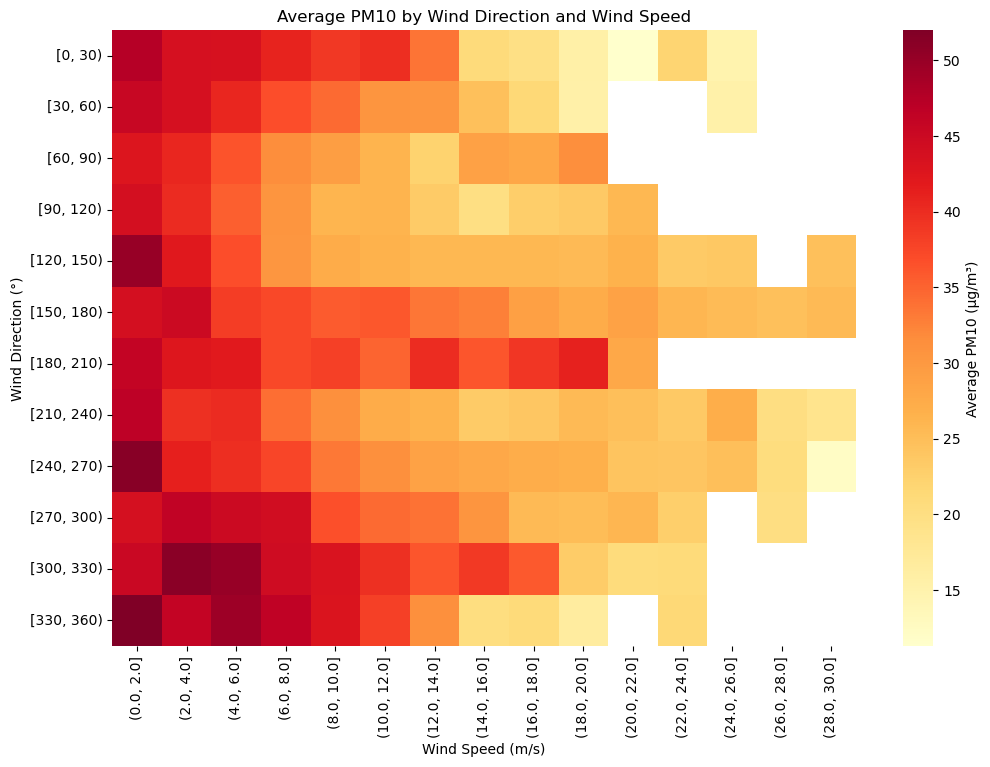

In [4]:
df1 = df_cleaned[['wind_speed_10m', 'wind_direction_10m', 'pm10']]

df1['wind_dir_bin'] = pd.cut(df1['wind_direction_10m'], bins=np.arange(0, 361, 30), right=False)
df1['wind_speed_bin'] = pd.cut(df1['wind_speed_10m'], bins=np.arange(0, df1['wind_speed_10m'].max() + 1, 2))

# Calculate average PM10 concentration for each bin
heatmap_data = df1.groupby(['wind_dir_bin', 'wind_speed_bin'])['pm10'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'Average PM10 (µg/m³)'})
plt.title('Average PM10 by Wind Direction and Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wind Direction (°)')
plt.savefig(question11_path)
plt.show()


#### ✍️ **Comments**
Based on the heatmap, we can observe the following:

* ***Wind Speed and PM10 Levels:*** Higher wind speeds (to the right on the x-axis) generally correlate with lower average PM10 concentrations. This trend suggests that as wind speed increases, it disperses particulate matter, lowering pollution concentrations in the area.

* ***Wind Direction and PM10 Levels:*** There are some directions that show relatively higher PM10 levels. For example:
    * Lower wind speeds (left side of the x-axis) in the direction range 0°-120° (top of the y-axis) are associated with higher PM10 concentrations.
    * The directions around 270°-300° also have slightly elevated PM10 levels, although not as high as those in the 0°-120° range.
    
$\Rightarrow$ This indicates that winds from certain directions (0°-120° and to a lesser extent, 270°-300°) might bring in higher levels of particulate pollution when the wind speed is low. Wind direction and speed both impact PM10 levels, with lower speeds and specific directions correlating with higher pollution. 

Average PM10 by wind direction:
 wind_direction_category
N     39.734267
NE    34.259903
E     28.603598
SE    33.062536
S     36.334359
SW    32.162137
W     41.508407
NW    45.896012
Name: pm10, dtype: float64


/tmp/ipykernel_21235/2601945102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['wind_direction_category'] = pd.cut(df1['wind_direction_10m'], bins=direction_bins, labels=direction_labels, include_lowest=True)


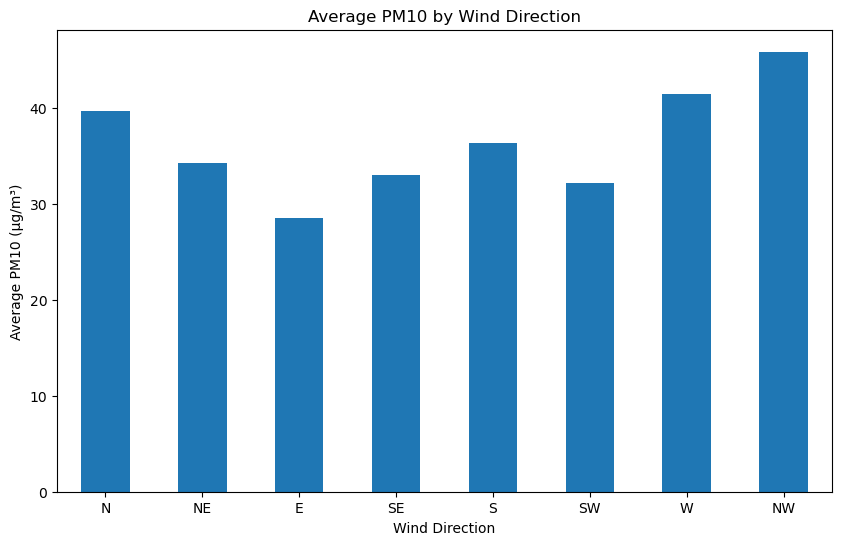

In [5]:
# Define wind direction bins and labels
direction_bins = [0, 45, 90, 135, 180, 225, 270, 315, 360]
direction_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

df1['wind_direction_category'] = pd.cut(df1['wind_direction_10m'], bins=direction_bins, labels=direction_labels, include_lowest=True)

# Calculate the mean pollutant levels for each wind direction category
pollution_by_direction = df1.groupby('wind_direction_category')['pm10'].mean()
print("Average PM10 by wind direction:\n", pollution_by_direction)

direction_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

pollution_by_direction.plot(kind='bar', figsize=(10, 6))
plt.title("Average PM10 by Wind Direction")
plt.xlabel("Wind Direction")
plt.ylabel("Average PM10 (µg/m³)")
plt.xticks(rotation=0)
plt.savefig(question12_path)
plt.show()

#### ✍️ **Comments**

The wind direction is categorized into bins corresponding to compass directions (e.g., N, NE, etc.).

Based on the bar chart, we can observe the following:

* ***High PM10 Levels from West and Northwest:*** The highest average PM10 concentrations are observed when the wind comes from the West (W) and Northwest (NW) directions, with averages of 41.5 µg/m³ and 45.9 µg/m³, respectively. This suggests that winds from these directions are associated with increased PM10 levels, potentially due to sources of pollution located in those directions relative to the monitoring area.

* ***Moderate PM10 Levels from North and South:*** Winds from the North (N) and South (S) also show relatively high PM10 levels, around 39.7 µg/m³ and 36.3 µg/m³, respectively. These directions may contribute to moderate pollution levels, possibly due to additional sources or lesser dispersion effects.
* ***Lower PM10 Levels from East and Southeast:*** Winds from the East (E) and Southeast (SE) bring in lower PM10 levels, averaging 28.6 µg/m³ and 33.1 µg/m³, respectively. This could indicate that these directions either have fewer pollution sources or provide better natural dispersion for pollutants.
    
$\Rightarrow$ The data suggests that winds from the West and Northwest bring the highest PM10 pollution levels. Winds from the East and Southeast are associated with cleaner air, possibly due to fewer pollution sources or more effective pollutant dispersion in those directions.

### 2️⃣ **How do extreme weather events (identified by weather_status) affect air quality parameters, and what are the lag effects on pollutant concentrations?**

**Answering this question will** help us understand the impact of extreme weather events on air quality can help anticipate pollution levels following events like storms or heatwaves. This is crucial for managing public health responses and air quality controls during and after such events.

**How we answer this question:** 
* Use `weather_status` to identify extreme weather events (e.g., Heavy Rain, Dense Drizzle) and then analyze pollutant levels (`pm10`, `pm2_5`, `carbon_monoxide, nitrogen_dioxide, sulphur_dioxide` and `ozone`) during and after these events.
* To assess lag effects, examine pollutant levels at various intervals after extreme weather events, such as 1 hour, 6 hours, and 24 hours post-event, to observe how pollutant concentrations respond over time.

In [6]:
# Preprocess data
# Identify extreme weather events
extreme_weather_types = ['Dense Drizzle', 'Dense Freezing Drizzle', 'Heavy Rain', 'Heavy Freezing Rain', 'Heavy Snow', 'Violent Rain Showers', 'Heavy Snow Showers']
df_cleaned['is_extreme'] = df_cleaned['weather_status'].isin(extreme_weather_types)

# Define pollutants to analyze
pollutants = ['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide', 'ozone']

stats_df = pd.DataFrame()

In [7]:
# Calculate statistics for each pollutant
for pollutant in pollutants:
    # Calculate for normal weather
    normal_stats = df_cleaned[~df_cleaned['is_extreme']][pollutant].describe()
    # Calculate for extreme weather
    extreme_stats = df_cleaned[df_cleaned['is_extreme']][pollutant].describe()
    
    stats_df[f'{pollutant}_normal'] = normal_stats
    stats_df[f'{pollutant}_extreme'] = extreme_stats

# Analyze lag effect
lag_hours = [1, 6, 24]
for pollutant in pollutants:
    for lag in lag_hours:
        df_cleaned[f'{pollutant}_lag_{lag}h'] = df_cleaned[pollutant].shift(-lag)

# Calculate the average rolling values for each pollutant
window_sizes = [1, 6, 24]
for pollutant in pollutants:
    for window in window_sizes:
        df_cleaned[f'{pollutant}_rolling_{window}h'] = df_cleaned[pollutant].rolling(window=window).mean()

In [8]:
stats_df

,pm10_normal,pm10_extreme,pm2_5_normal,pm2_5_extreme,carbon_monoxide_normal,carbon_monoxide_extreme,nitrogen_dioxide_normal,nitrogen_dioxide_extreme,sulphur_dioxide_normal,sulphur_dioxide_extreme,ozone_normal,ozone_extreme
count,17294.000000,250.000000,17294.000000,250.000000,17294.000000,250.000000,17294.000000,250.000000,17294.000000,250.000000,17294.000000,250.000000
mean,34.988938,36.088400,23.433590,24.592800,448.311091,428.592000,28.210648,28.851400,20.908567,24.397200,52.861744,61.980000
std,17.023257,14.673312,11.812398,10.111413,256.804587,251.535193,17.926496,16.668852,13.655230,11.405578,41.040082,41.462757
min,0.400000,11.700000,0.300000,7.900000,59.000000,173.000000,0.000000,6.600000,0.000000,1.600000,0.000000,0.000000
25%,22.600000,26.200000,14.800000,18.025000,271.000000,273.000000,14.900000,15.300000,10.500000,17.725000,20.000000,24.250000
50%,31.500000,33.750000,21.000000,22.750000,380.000000,358.000000,24.000000,25.050000,18.900000,23.900000,43.000000,59.500000
75%,43.500000,43.250000,29.300000,29.275000,554.000000,504.500000,38.100000,39.087500,29.000000,30.725000,79.000000,90.000000
max,158.800000,106.200000,110.600000,71.900000,3149.000000,1861.000000,170.350000,106.000000,56.600000,56.600000,272.000000,185.000000


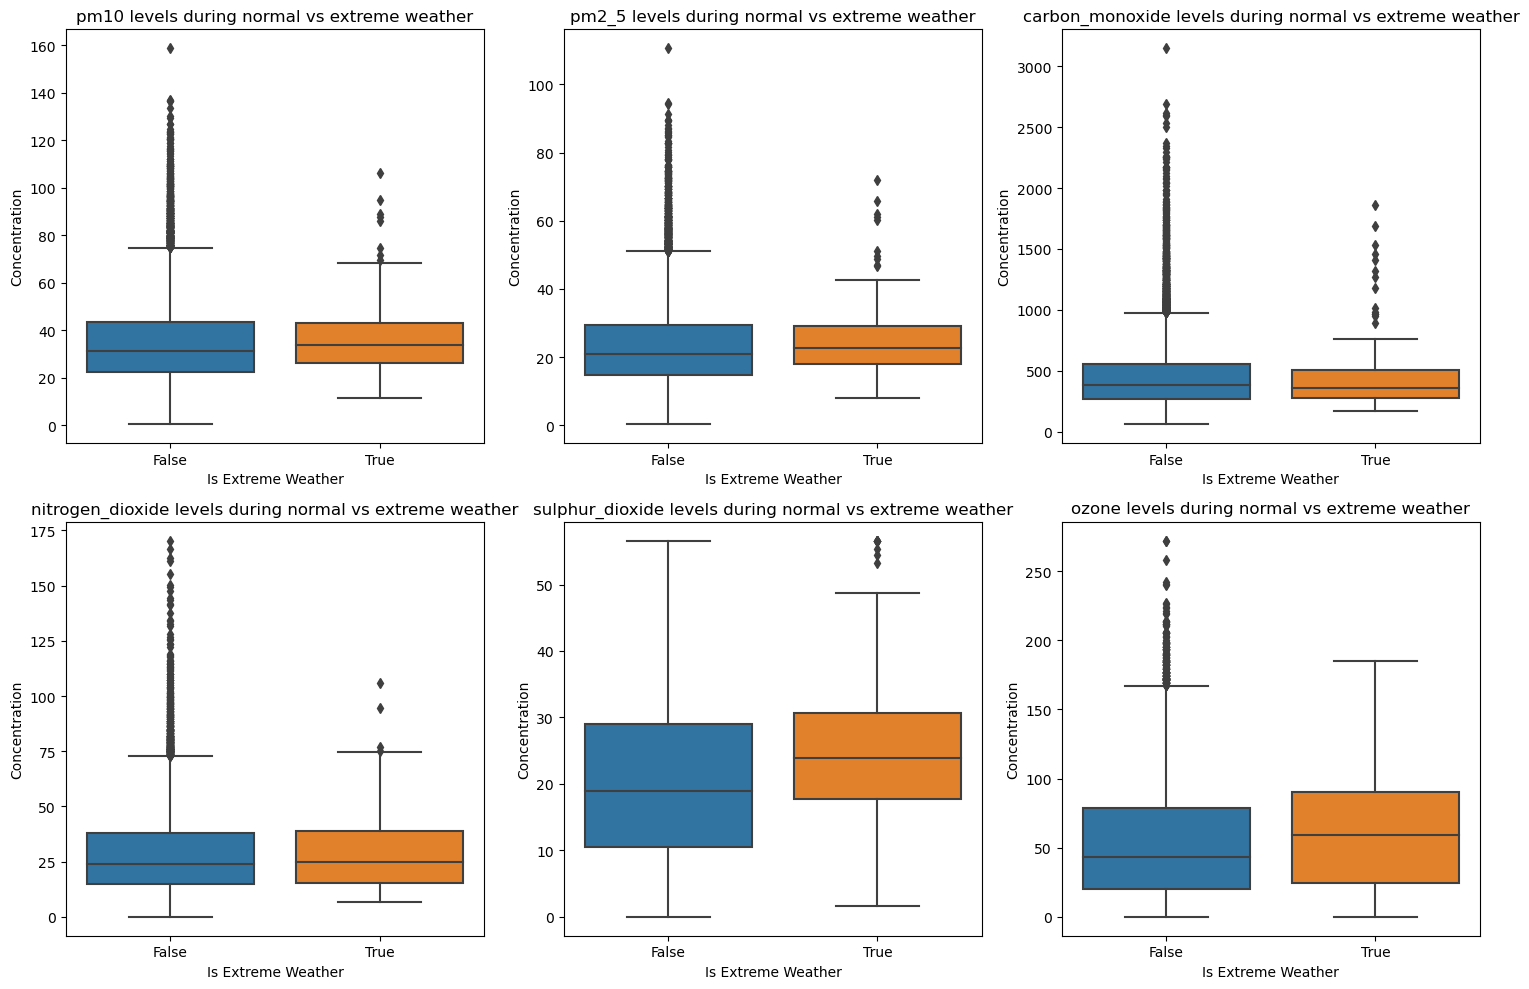

In [9]:
# Plot chart comparing pollutant concentrations 
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_extreme', y=pollutant, data=df_cleaned)
    plt.title(f'{pollutant} levels during normal vs extreme weather')
    plt.xlabel('Is Extreme Weather')
    plt.ylabel('Concentration')
plt.tight_layout()
plt.savefig(question21_path)
plt.show()

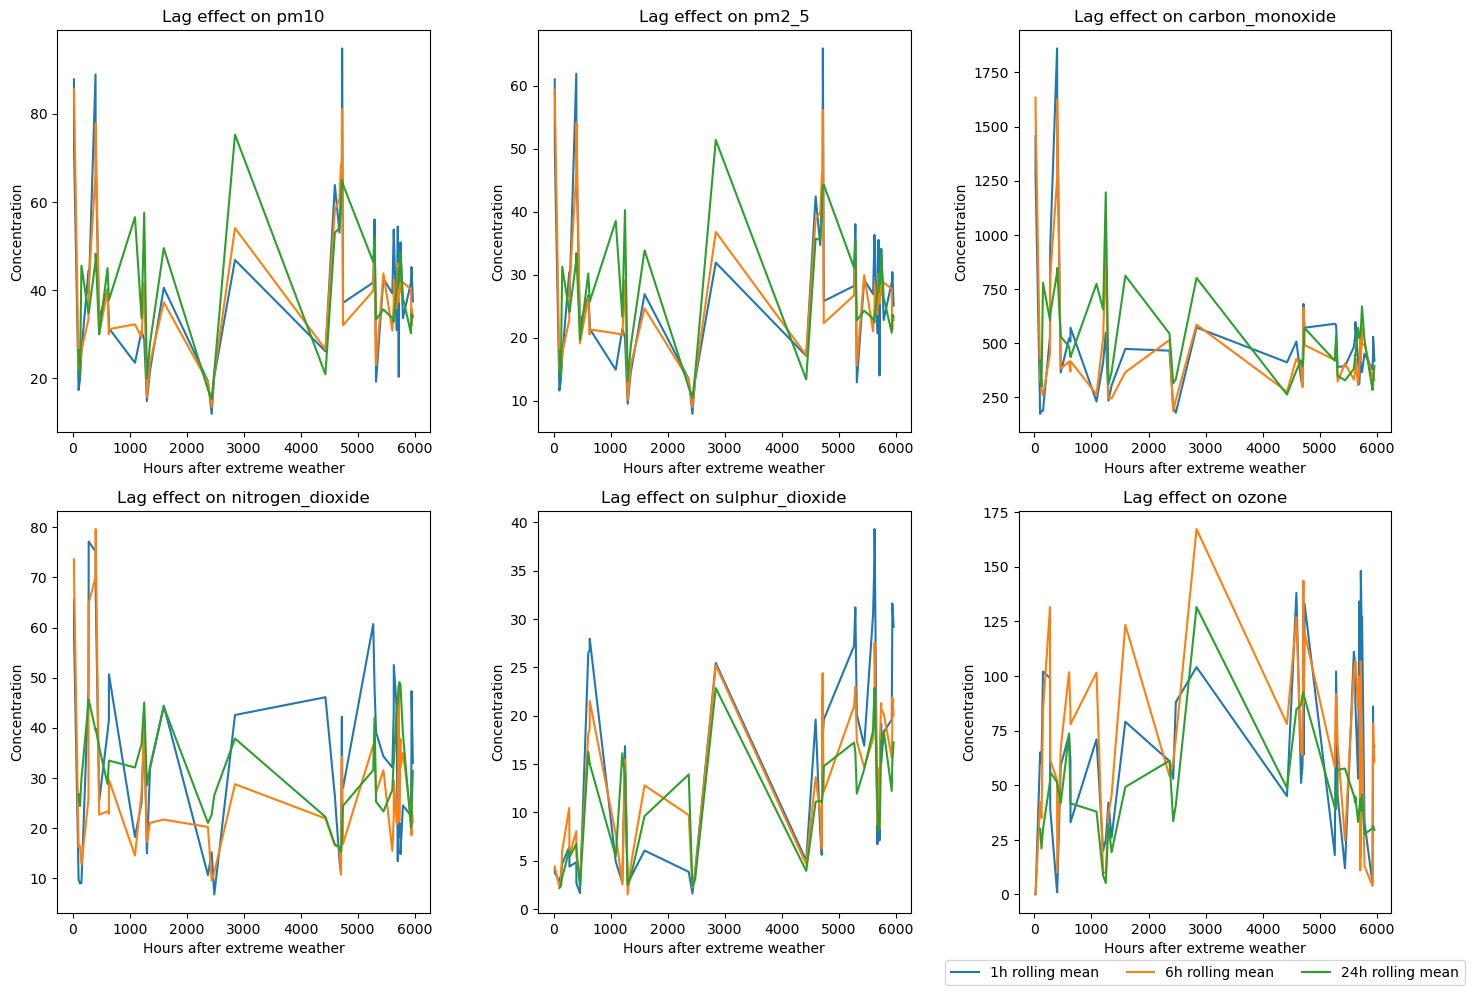

In [10]:
# Plot the chart lag effect for each pollutant
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)

    # Draw average line for each lag
    for window in window_sizes:
        plt.plot(df_cleaned[df_cleaned['is_extreme']][f'{pollutant}_rolling_{window}h'].head(48), 
                label=f'{window}h rolling mean')
    
    plt.title(f'Lag effect on {pollutant}')
    plt.xlabel('Hours after extreme weather')
    plt.ylabel('Concentration')
    
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.tight_layout()
plt.savefig(question22_path)
plt.show()


In [11]:
# Calculate t-test for each pollutant
ttest_results = []

for pollutant in pollutants:
    normal_data = df_cleaned[~df_cleaned['is_extreme']][pollutant].dropna()
    extreme_data = df_cleaned[df_cleaned['is_extreme']][pollutant].dropna()
    
    t_stat, p_val = stats.ttest_ind(normal_data, extreme_data)
    ttest_results.append({
        'pollutant': pollutant,
        't_statistic': t_stat,
        'p_value': p_val
    })

ttest_results = pd.DataFrame(ttest_results)
ttest_results

,pollutant,t_statistic,p_value
0,pm10,-1.015745,0.309765
1,pm2_5,-1.543487,0.122731
2,carbon_monoxide,1.205765,0.227924
3,nitrogen_dioxide,-0.561650,0.574362
4,sulphur_dioxide,-4.019238,0.000059
5,ozone,-3.487331,0.000489


In [12]:
# Calculate the percentage change in pollutant levels during extreme weather
percent_change = []

for pollutant in pollutants:
    normal_mean = df_cleaned[~df_cleaned['is_extreme']][pollutant].mean()
    extreme_mean = df_cleaned[df_cleaned['is_extreme']][pollutant].mean()
    
    change = ((extreme_mean - normal_mean) / normal_mean) * 100
    percent_change.append({
        'pollutant': pollutant,
        'percent_change': change
    })

percent_change = pd.DataFrame(percent_change)
percent_change

,pollutant,percent_change
0,pm10,3.142312
1,pm2_5,4.946789
2,carbon_monoxide,-4.398528
3,nitrogen_dioxide,2.271312
4,sulphur_dioxide,16.685187
5,ozone,17.249253


#### ✍️ **Comments**
Based on the analysis of extreme weather effects on air quality parameters, we observe:
1. Pollutant Concentration Changes:
- SO₂ and O₃ show the most significant increases during extreme weather (+16.69% and +17.25% respectively, p<0.001)
- Carbon Monoxide uniquely shows a decrease (-4.40%), suggesting possible washout effects
- PM10 and PM2.5 show slight increases (3.14% and 4.95%) but not statistically significant
- Most pollutants show lower variability during extreme weather, indicating more stable concentrations
2. Lag Effects After Weather Events:
- Peak concentrations typically occur within the first 1000 hours post-extreme weather
- Different pollutants show varying recovery patterns:
    - CO stabilizes most quickly after events
    - PM10 and PM2.5 show gradual stabilization over 4000 hours
    - O₃ demonstrates the most pronounced and extended fluctuations
- 24-hour rolling averages show more stable trends compared to shorter timeframes

$\Rightarrow$ In summary, extreme weather events have varying impacts on different pollutants, with SO₂ and O₃ being most significantly affected. The lag effects persist for considerable periods (1000-4000 hours), suggesting the need for extended monitoring and management strategies post-extreme weather events. This information is crucial for public health response planning and air quality management during and after extreme weather conditions.

### 3️⃣ **Are there distinct seasonal or monthly patterns in air quality metrics?** 

**Answering this question will** help us understand understand how air quality varies throughout the year and the influence of seasonal weather changes. This insight is valuable for forecasting pollution trends, informing public health advisories, and developing seasonal strategies to manage air quality.

**How we answer this question:** 
* Use date_time to group data by month or season, and analyze trends in air quality metrics like `pm10`, `pm2_5`, `us_aqi`, and other pollutants over time.
* Evaluate correlations between weather metrics (`temperature_2m`, `relative_humidity_2m`, `precipitation`, `cloud_cover`, etc.) and air quality metrics to observe seasonal changes in air quality.

In [13]:
df3 = df_cleaned.copy()

# Extract year, month and season from 'date_time'
df3['month'] = df3['date_time'].dt.month
# Define seasons based on months
season_mapping = {
    1: 'Dry', 2: 'Dry', 3: 'Dry', 4: 'Dry', 5: 'Rainy', 6: 'Rainy',
    7: 'Rainy', 8: 'Rainy', 9: 'Rainy', 10: 'Rainy', 11: 'Rainy', 12: 'Dry'
}
df3['season'] = df3['month'].map(season_mapping)

df3['month_year'] = df3['date_time'].dt.to_period('M')

<Figure size 2000x600 with 0 Axes>

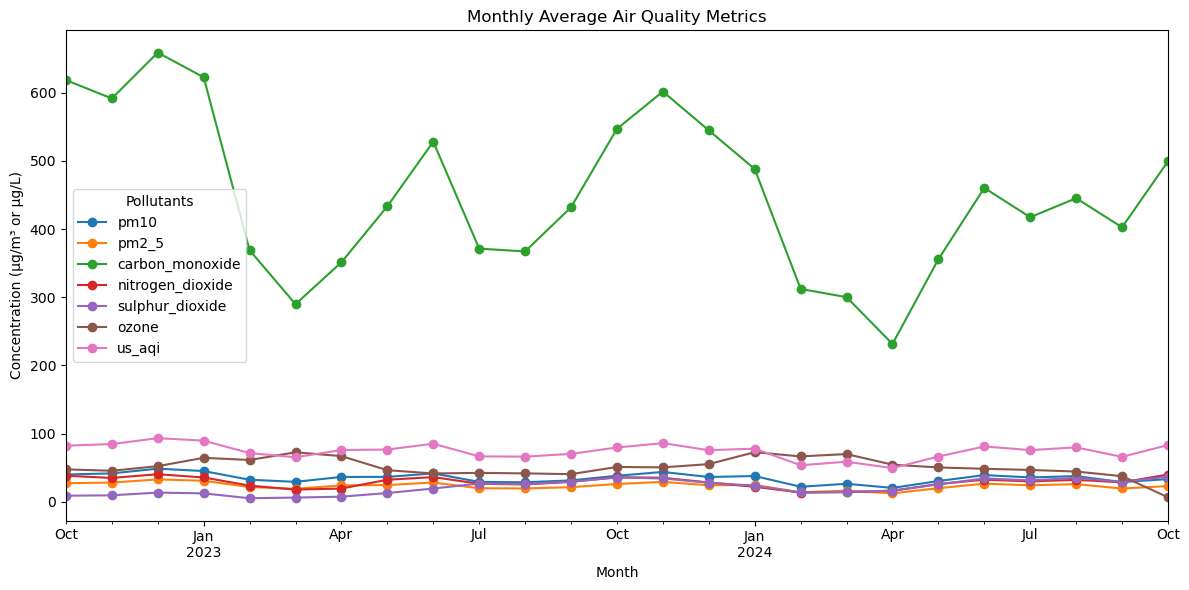

In [14]:
monthly_avg = df3.groupby('month_year')[['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 
                                    'sulphur_dioxide', 'ozone', 'us_aqi']].mean()

plt.figure(figsize=(20, 6))
monthly_avg.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Monthly Average Air Quality Metrics')
plt.xlabel('Month')
plt.ylabel('Concentration (µg/m³ or µg/L)')
plt.legend(title="Pollutants")
plt.tight_layout()
plt.savefig(question3_path)
plt.show()

#### ✍️ **Comments**
Based on the line chart, we can observe the following:

* Carbon Monoxide (CO): This pollutant stands out with significantly higher concentrations than the others, fluctuating around 300–700 µg/m³. It shows a noticeable seasonal trend, with peaks around the last months of the year and lower concentrations in early summer. This suggests that CO levels might be influenced by weather conditions or emissions patterns, possibly from traffic or industrial activities.

* Other Pollutants: The rest of the pollutants (PM10, PM2.5, NO₂, SO₂, O₃, and US AQI) have relatively low concentrations compared to CO, all staying below 100 µg/m³. These pollutants exhibit smaller fluctuations and are generally stable throughout the year.

$\Rightarrow$ In summary, Carbon Monoxide levels appear to be the primary concern due to their high concentration and seasonal spikes, while other pollutants remain relatively low and stable across the months. This could indicate targeted issues related to CO pollution sources, potentially suggesting an area for further investigation or intervention.

### 4️⃣ **What is the relationship between precipitation and air quality? Does rainfall help reduce pollutant concentrations, and if so, to what extent?**

**Answering this question will** clarify whether and how rainfall affects pollutant levels, offering insights into natural pollutant reduction mechanisms. This knowledge can support air quality management strategies, particularly in regions with varying rainfall patterns, and help inform public health recommendations during different weather conditions.

**How we answer this question:**
* Examine correlations between `precipitation` and pollutant levels (`pm10`, `pm2_5`, `us_aqi`) to see if rainfall consistently lowers pollutant concentrations.
* Compare average pollutant levels with and without rainfall events to quantify the effect of precipitation on air quality.

Correlation between precipitation and pollutant levels:
pm10     -0.011551
pm2_5    -0.005645
us_aqi    0.011018
Name: precipitation, dtype: float64


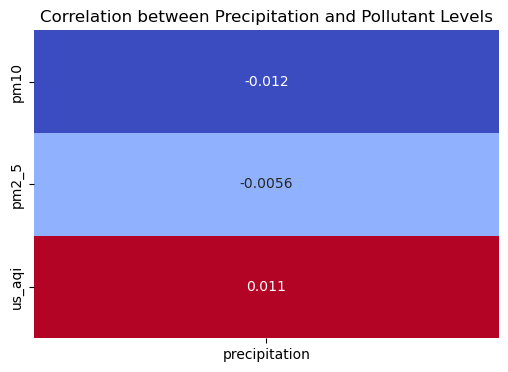

In [15]:
df4 = df_cleaned.copy()

pollutants = ['pm10', 'pm2_5', 'us_aqi']
correlations = df_cleaned[['precipitation'] + pollutants].corr()['precipitation'].drop('precipitation')
print("Correlation between precipitation and pollutant levels:")
print(correlations)

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title("Correlation between Precipitation and Pollutant Levels")
plt.savefig(question41_path)
plt.show()


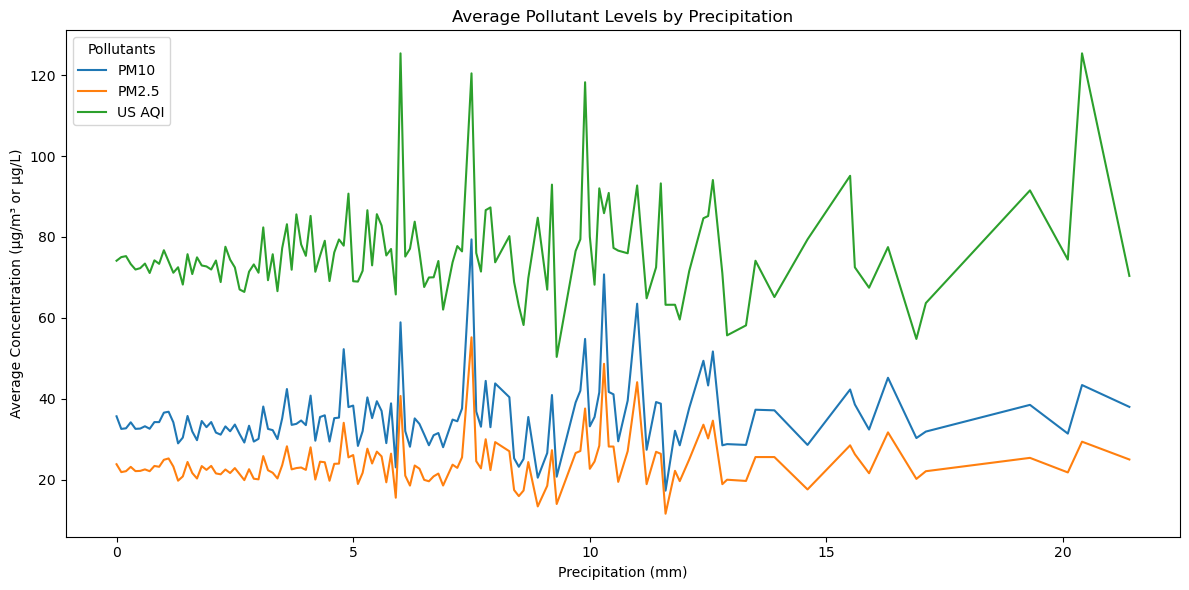

In [16]:
precipitation_data = df4.groupby('precipitation')[['pm10', 'pm2_5', 'us_aqi']].mean().reset_index()

# Plotting average pollutant levels by precipitation
plt.figure(figsize=(12, 6))
sns.lineplot(data=precipitation_data, x='precipitation', y='pm10', label='PM10')
sns.lineplot(data=precipitation_data, x='precipitation', y='pm2_5', label='PM2.5')
sns.lineplot(data=precipitation_data, x='precipitation', y='us_aqi', label='US AQI')
plt.title('Average Pollutant Levels by Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Average Concentration (µg/m³ or µg/L)')
plt.legend(title='Pollutants')
plt.tight_layout()
plt.savefig(question42_path)
plt.show()

#### ✍️ **Comment**

Based on the correlation values between precipitation and pollutant levels in the charts:
* ***PM10 and PM2_5:*** Weak negative correlation (-0.012 and -0.0056), suggesting minimal reduction with rainfall. There are noticeable peaks in PM10 and PM2.5 concentrations at lower precipitation values (around 0–5 mm). This might indicate that low or no rainfall correlates with higher pollutant concentrations, possibly due to stagnant air conditions allowing pollutants to accumulate.
* ***US AQI:*** Slight positive correlation (0.011), suggesting rainfall may not lower AQI. The US AQI line shows significant variability, with sharp peaks and dips even at lower precipitation levels. This could indicate that air quality is influenced by other environmental factors beyond just precipitation, such as wind speed, temperature, or specific weather events.

$\Rightarrow$ Rainfall shows minimal impact on pollutant levels.


Average pollutant levels for Rain and No Rain events:
                     pm10      pm2_5     us_aqi
rainfall_event                                 
No Rain         35.323780  23.609331  74.227028
Rain            33.359698  22.629533  73.956431


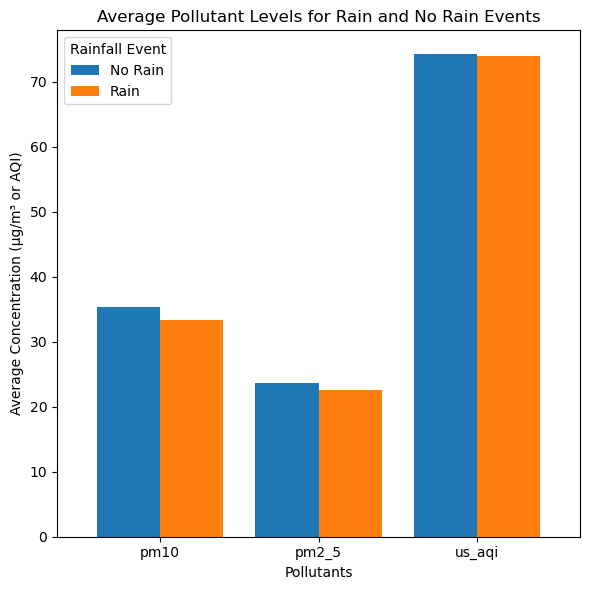

In [17]:
# Define rainfall events: Assume rainfall > 0.1 mm as a rainfall event
df4['rainfall_event'] = np.where(df4['precipitation'] > 0.1, 'Rain', 'No Rain')

# Group by rainfall event and calculate mean pollutant levels
rainfall_effect = df4.groupby('rainfall_event')[pollutants].mean()

print("\nAverage pollutant levels for Rain and No Rain events:")
print(rainfall_effect)

# Transpose the dataframe for easier plotting with pollutants on the x-axis
rainfall_effect = rainfall_effect.T

# Plot as grouped bar chart
ax = rainfall_effect.plot(kind='bar', figsize=(6, 6), width=0.8)
plt.title("Average Pollutant Levels for Rain and No Rain Events")
plt.xlabel("Pollutants")
plt.ylabel("Average Concentration (µg/m³ or AQI)")
plt.legend(title="Rainfall Event")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(question43_path)
plt.show()

#### ✍️ **Comment**

Based on the Average pollutant levels in the chart:
* ***PM10:*** lower during "Rain" (33.36 µg/m³) compared to "No Rain" (35.32 µg/m³), suggesting a slight reduction in particulate matter during rainfall.
* ***PM2.5:*** lower during "Rain" (22.63 µg/m³) compared to "No Rain" (23.61 µg/m³), indicating that rainfall might help reduce smaller particulates as well.
* ***US AQI:*** remains relatively stable across different rainfall events, with only minor fluctuations. This implies that rainfall does not significantly influence overall air quality (as represented by AQI).

➡️ Rainfall seems to contribute slightly to the reduction of particulate pollutants (PM10 and PM2.5), but the effect is relatively minor and not strong enough to significantly impact the overall air quality (as reflected by AQI). This finding implies that while rain can help reduce pollutant levels, it may not be sufficient to substantially improve air quality on its own.

### 5️⃣ **Are there specific times of day (morning, afternoon, evening) when pollution levels tend to be higher?**

**Answering this question will** help us identify peak times for pollution during the day, which can be crucial for public health advisories and urban planning. Understanding daily pollution patterns enables environmental agencies to provide timely warnings and helps the public avoid outdoor activities during high-pollution periods.

**How we answer this question:** 
* Extract the hour from the date_time column to categorize data into time periods: morning, afternoon, and evening.
* Calculate and compare average pollutant levels (e.g., pm10, pm2_5, ozone) for each time period to determine if certain times of day consistently show higher pollution levels.

In [18]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

Average Pollution Levels by Time of Day:
                  pm10      pm2_5  carbon_monoxide  nitrogen_dioxide  \
time_of_day                                                            
Morning      31.806175  21.311003       410.046121         23.269318   
Afternoon    33.790926  22.350479       326.167579         17.503272   
Evening      37.701977  25.411155       538.672180         37.215440   

             sulphur_dioxide       ozone  
time_of_day                               
Morning            21.521233   46.114716  
Afternoon          18.989216  102.154127  
Evening            21.674070   30.552046  


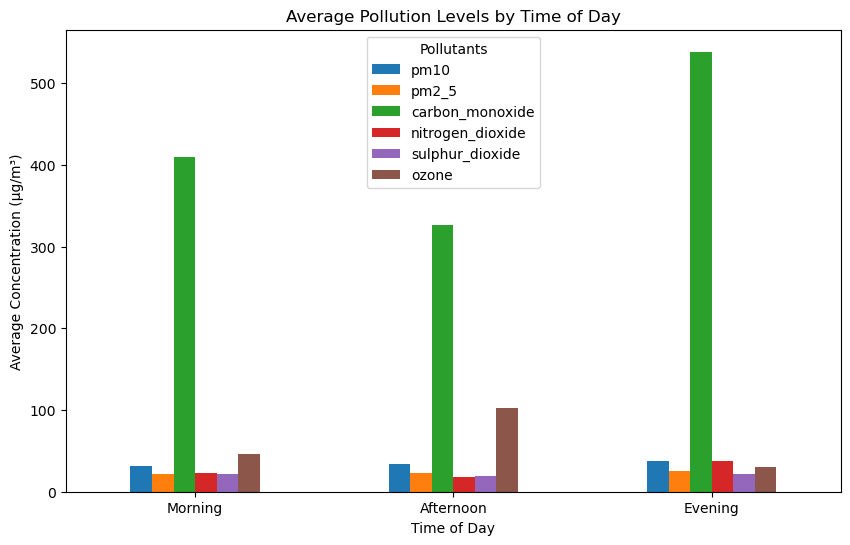

In [19]:
df5 = df_cleaned.copy()

df5['time_of_day'] = df5['date_time'].dt.hour.apply(categorize_time_of_day)

# Calculate average pollutant levels by time of day
pollutants = ['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide', 'ozone']
avg_pollution_by_time = df5.groupby('time_of_day')[pollutants].mean()

# Sort to show in a logical order: Morning, Afternoon, Evening
avg_pollution_by_time = avg_pollution_by_time.reindex(['Morning', 'Afternoon', 'Evening'])

# Display the results
print("Average Pollution Levels by Time of Day:")
print(avg_pollution_by_time)


avg_pollution_by_time.plot(kind='bar', figsize=(10, 6))
plt.title("Average Pollution Levels by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Concentration (µg/m³)")
plt.xticks(rotation=0)
plt.legend(title="Pollutants")
plt.savefig(question5_path)
plt.show()

#### ✍️ **Comments**
Based on the chart, we can observe the following:

* ***Ozone*** Ozone concentrations are highest in the morning (around 95.8 µg/m³) and significantly decrease in the afternoon and evening (31.2 µg/m³ and 37.6 µg/m³, respectively). This trend could be influenced by sunlight and cloud cover variations throughout the day. Ozone formation is typically affected by sunlight, so lower afternoon and evening values may reflect cloud cover or reduced sunlight intensity as the day progresses.

* ***PM10 and PM2.5***: PM10 and PM2.5 levels are somewhat consistent across different times of day, with slightly higher concentrations in the afternoon. This pattern suggests that these particulate pollutants might be less sensitive to sunlight or cloud cover and more affected by traffic or industrial activities, which remain steady throughout the day.

* ***Carbon Monoxide***: CO levels show dramatic peaks in the evening (530 μg/m³) and morning (410 μg/m³), with lower concentrations in the afternoon (330 μg/m³). This pattern strongly correlates with rush hour traffic patterns, reflecting vehicle emissions during peak commuting times.

* ***Nitrogen*** and ***Sulfur Oxides***: NO₂ shows minor increases in evening hours, while SO₂ maintains stable, low concentrations throughout the day. These patterns likely reflect a combination of industrial emissions and traffic patterns, with NO₂ more responsive to vehicle emissions during peak travel times.

➡️ In summary, the pollution patterns show distinct daily cycles where carbon monoxide peaks dramatically during morning and evening rush hours (410-530 μg/m³), while ozone shows a characteristic afternoon peak (~100 μg/m³) driven by sunlight intensity. Particulate matter (PM10 and PM2.5) maintains relatively stable levels throughout the day with minor fluctuations, and nitrogen/sulfur oxides show modest variations, with NO₂ slightly elevated during peak traffic periods. These patterns strongly suggest that pollution levels are primarily influenced by a combination of human activity cycles (especially traffic) and natural environmental factors like sunlight.

### 6️⃣ **Does a significant increase or decrease in temperature impact pollutant levels such as NO2 and ozone?**

**Answering this question will** provide insights into how temperature fluctuations influence air quality, helping to identify critical temperature thresholds that exacerbate or alleviate pollution levels. This is vital for environmental monitoring and creating responsive air quality management strategies.

**How we answer this question:** 

* Examine the relationship between extreme temperature changes (temperature_2m, apparent_temperature) and pollutant levels (NO2, ozone).
* Perform statistical analysis to detect trends and thresholds where temperature changes significantly affect pollutant concentrations.
* Visualize correlations and trends using scatter plots, time series plots, and regression models.

In [ ]:
df6 = df_cleaned.copy()

# Define high and low temperature thresholds
high_temp_threshold = df6['temperature_2m'].quantile(0.95)
low_temp_threshold = df6['temperature_2m'].quantile(0.05)

# Categorize data based on temperature thresholds
df6['temp_category'] = pd.cut(df6['temperature_2m'], 
                                     bins=[-np.inf, low_temp_threshold, high_temp_threshold, np.inf], 
                                     labels=['Low', 'Normal', 'High'])

# Analyze pollutant levels during extreme temperature conditions
pollutants = ['nitrogen_dioxide', 'ozone']
pollutant_stats = df6.groupby('temp_category')[pollutants].describe()

print("Pollutant levels during different temperature conditions:")
pollutant_stats

Pollutant levels during different temperature conditions:


nitrogen_dioxide                                             \
                         count       mean        std  min      25%    50%   
temp_category                                                               
Low                      890.0  35.191573  21.824851  0.0  19.2125  30.45   
Normal                 15782.0  28.835794  17.508611  0.0  15.8000  24.80   
High                     872.0   9.955046   5.385596  3.3   6.1000   8.20   

                                  ozone                                     \
                   75%     max    count        mean        std   min   25%   
temp_category                                                                
Low            48.6375  132.60    890.0   28.465169  20.334033   0.0  13.0   
Normal         38.5000  170.35  15782.0   51.460525  40.360431   0.0  19.0   
High           12.7000   38.60    872.0  105.736239  24.017343  44.0  91.0   

                                    
                 50%    75%    max  
temp_category                       
Low             24.0   41.0  105.0  
Normal          42.0   75.0  272.0  
High           104.0  119.0  195.0

In [21]:
# Perform statistical tests
ttest_results = []
for pollutant in pollutants:
    low_temp_data = df6[df6['temp_category'] == 'Low'][pollutant].dropna()
    high_temp_data = df6[df6['temp_category'] == 'High'][pollutant].dropna()
    
    t_stat, p_val = stats.ttest_ind(low_temp_data, high_temp_data)
    ttest_results.append({
        'pollutant': pollutant,
        't_statistic': t_stat,
        'p_value': p_val
    })

ttest_results = pd.DataFrame(ttest_results)
print("\nT-test results for pollutant levels during extreme temperature conditions:")
ttest_results


T-test results for pollutant levels during extreme temperature conditions:


,pollutant,t_statistic,p_value
0,nitrogen_dioxide,33.170409,7.912829e-188
1,ozone,-72.939745,0.000000e+00


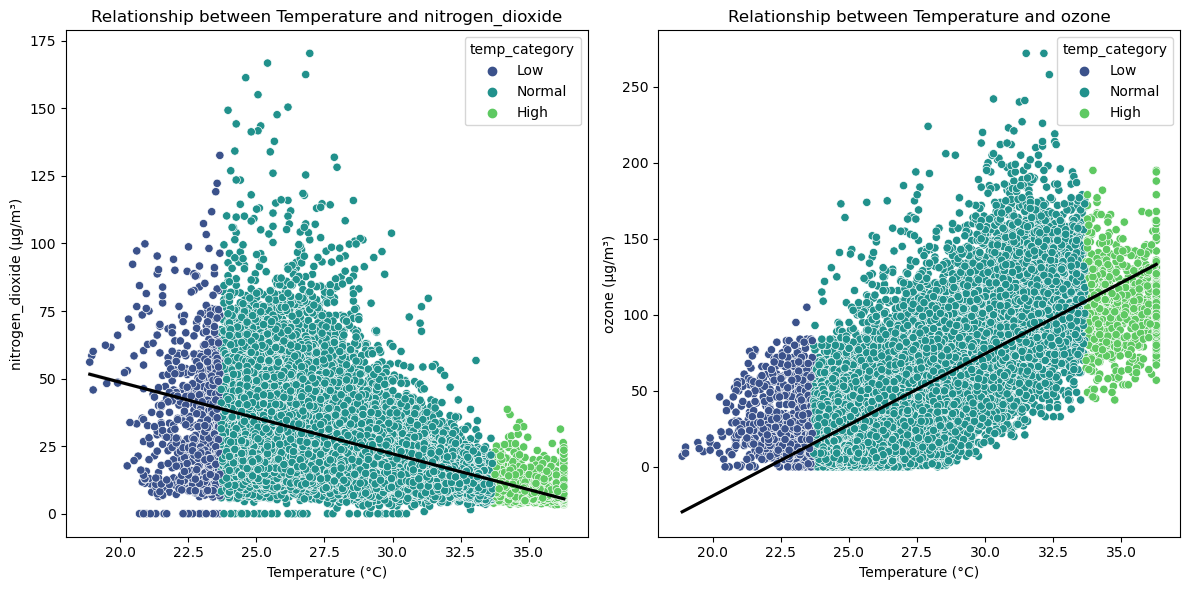

In [22]:
# Visualization
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(data=df6, x='temperature_2m', y=pollutant, hue='temp_category', palette='viridis')
    sns.regplot(data=df6, x='temperature_2m', y=pollutant, scatter=False, color='black')
    plt.title(f'Relationship between Temperature and {pollutant}')
    plt.xlabel('Temperature (°C)')
    plt.ylabel(f'{pollutant} (µg/m³)')
plt.tight_layout()
plt.savefig(question6_path)
plt.show()

#### ✍️ **Comment**
Base on the statistics and chart above, we can observe the following:

**1. Relationship between Temperature and NO2:**
* The scatter plot shows a clear negative trend between temperature and nitrogen dioxide (NO2) levels. As temperature increases, NO2 levels tend to decrease.
* The data points are more dispersed at lower temperatures, indicating a wider range of NO2 concentrations.
* At higher temperatures, the data points cluster more tightly, suggesting a more consistent inverse relationship between temperature and NO2.

**2. Relationship between Temperature and Ozone:**
* The scatter plot for ozone exhibits a positive trend, where higher temperatures correspond to higher ozone levels.
* The data points are more scattered compared to the NO2 plot, but the overall positive correlation is still evident.
* At the highest temperature range, the ozone levels appear to increase more sharply, indicating a potentially nonlinear relationship.

➡️ These visual observations highlight the contrasting relationships between temperature and the two pollutants, NO2 and ozone. Understanding these dynamics is crucial for developing targeted air quality management strategies that account for the influence of meteorological conditions on different air pollutants.

## 🌠 **Conclusion: Weather and Air Quality Relationships**


Weather plays a critical role in shaping air quality by influencing pollutant concentrations, dispersion, and chemical transformations. The analysis of various weather factors and their impacts on air quality reveals the following key relationships:

**1. Wind Effects**

* Wind Speed: Higher wind speeds reduce PM10 concentrations by dispersing particulate matter, while lower speeds allow pollutants to accumulate.
* Wind Direction: Winds from specific directions, such as West and Northwest, are associated with higher PM10 levels, suggesting localized pollution sources in those regions. In contrast, winds from East and Southeast are correlated with cleaner air, likely due to fewer emission sources or effective dispersion.

**2. Extreme Weather Events**

* Immediate Impacts: SO₂ and O₃ concentrations increase significantly during extreme weather events, while CO levels decrease, indicating potential washout effects. PM10 and PM2.5 show minor increases but remain relatively stable.
* Lag Effects: The effects of extreme weather persist for extended periods (up to 1000-4000 hours), with pollutants like ozone demonstrating prolonged fluctuations. This underscores the need for continued monitoring after such events.

**3. Seasonal and Temporal Patterns**

* Seasonal Variations: Carbon monoxide (CO) exhibits clear seasonal spikes during colder months, likely driven by increased emissions and limited dispersion. Other pollutants, such as PM10 and PM2.5, remain relatively stable year-round.
* Daily Patterns: Ozone peaks in the morning, influenced by sunlight-driven photochemical reactions, while PM10 and PM2.5 show consistent levels throughout the day, slightly increasing in the afternoon due to traffic and industrial activities.

**4. Rainfall and Air Quality**

* Precipitation Impacts: Rainfall has a limited but measurable impact on reducing particulate matter (PM10 and PM2.5), suggesting some natural cleansing effects. However, its influence on overall air quality (US AQI) remains minimal, as other pollutants like ozone and nitrogen dioxide are less affected.

**5. Temperature Effects**

* Nitrogen Dioxide (NO₂): Higher temperatures are associated with lower NO₂ levels, likely due to enhanced atmospheric mixing and photochemical transformation.
* Ozone (O₃): Ozone levels rise significantly with increasing temperatures, reflecting the role of heat and sunlight in driving photochemical reactions. At extreme temperatures, ozone concentrations spike nonlinearly, posing greater risks to air quality and public health.


In summary, weather factors like wind, temperature, precipitation, and extreme events significantly influence air quality. A nuanced understanding of these relationships can help design targeted strategies to reduce pollution, protect public health, and improve urban air quality management.